In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 生成测试数据

In [22]:
data = [[ 0.98, 0.71, 0.83, 0.57, 0.91],
        [ 0.72, 0.87,  0.99, 0.42, 0.95],
        [ 0.63,  0.87, 0.91, 0.76, 0.98],
        [ 0.95,  0.2, 0.7, 0.93,  0.99]]

columns = ('Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5')
rows = ['Metric %d' % x for x in (1, 2, 3, 4)]

pltPD = pd.DataFrame(data, columns=columns, index=rows)
pltPD

,Model 1,Model 2,Model 3,Model 4,Model 5
Metric 1,0.98,0.71,0.83,0.57,0.91
Metric 2,0.72,0.87,0.99,0.42,0.95
Metric 3,0.63,0.87,0.91,0.76,0.98
Metric 4,0.95,0.20,0.70,0.93,0.99


## 进行绘图

### 按照Model进行绘制

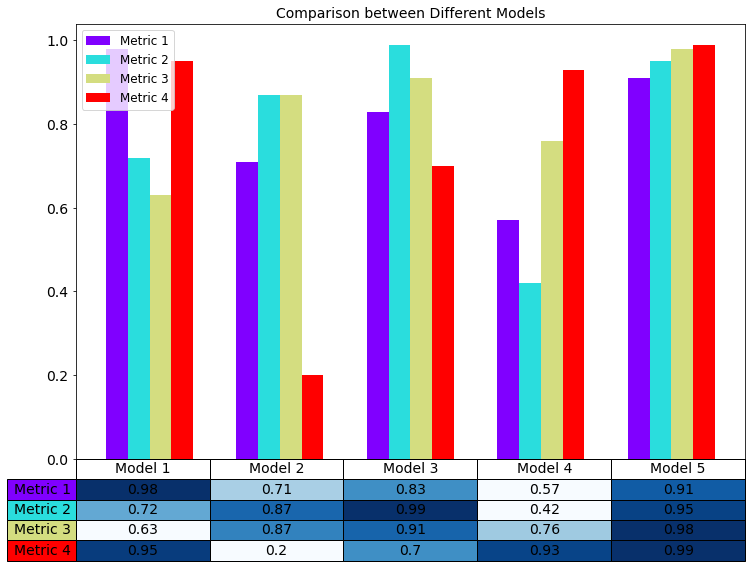

In [20]:
# 按照model来进行汇总, 这里共有5个model
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

# 自定义颜色
# colors = plt.cm.BuPu(np.linspace(0, 0.5, len(pltPD.index.values)))
colors = plt.cm.rainbow(np.linspace(0, 1, len(pltPD.index.values))) # plasma, rainbow, jet
n_rows = len(pltPD.index.values)

# 设置barchart的x轴
w=0.3
index = np.arange(len(pltPD.columns.values))*n_rows*w*1.5 # 5个model, 所以是5


# 首先绘制柱状图
for row in range(n_rows):
    plt.bar(index+row*w, pltPD.values[row], width=w, align='center', color=colors[row], label=pltPD.index.values[row])

# 添加图例
ax.legend(fontsize=12)

# 矩阵的颜色高亮
# norm = plt.Normalize(0, 1)
# cellColours = plt.cm.Blues(norm(pltPD.values))
# 使用最大最小标准化, 使得颜色区分更大
minmax = (pltPD.values - pltPD.values.min(1, keepdims=True)) / (pltPD.values.max(1, keepdims=True) - pltPD.values.min(1, keepdims=True))
cellColours = plt.cm.Blues(minmax)

# 添加一个表格在底部
the_table = plt.table(cellText=pltPD.values,
                      cellColours = cellColours,
                      rowLabels=pltPD.index.values,
                      rowColours=colors, # 每一列的颜色
                      colLabels=pltPD.columns.values,
                      loc='bottom',
                      cellLoc='center')
the_table.set_fontsize(14)
the_table.scale(1.0, 1.7)  # may help

# 调整table的布局
# plt.subplots_adjust(left=0.2, bottom=0.1)

# label和ticks的设置
# minN, maxN = pltPD.values.flatten().min(), pltPD.values.flatten().max()
# plt.yticks(np.arange(minN, maxN, (maxN-minN)/5), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.xticks([])
plt.title('Comparison between Different Models', fontsize=14)

plt.show()

### 按照Metric绘制

In [146]:
pltPD.T

,Metric 1,Metric 2,Metric 3,Metric 4
Model 1,66386,58230,89135,78415
Model 2,174296,381139,80552,81858
Model 3,75131,78045,152558,150656
Model 4,577908,99308,497981,193263
Model 5,32015,160454,603535,69638


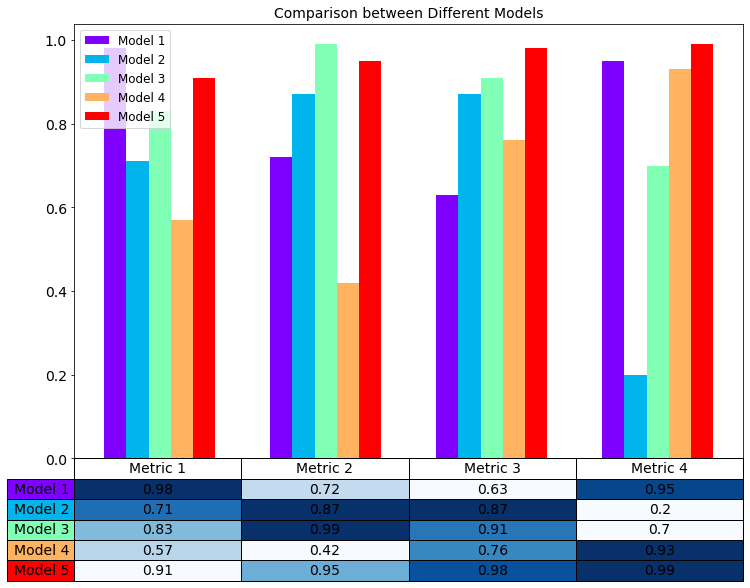

In [21]:
# 按照metric来进行汇总, 这里共有4种metric, 可以很容易比较模型的好坏
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

# 进行转置
pltPD = pltPD.T

# 自定义颜色
# colors = plt.cm.BuPu(np.linspace(0, 0.5, len(pltPD.index.values)))
colors = plt.cm.rainbow(np.linspace(0, 1, len(pltPD.index.values))) # plasma, rainbow, jet
n_rows = len(pltPD.index.values)

# 设置barchart的x轴
w=0.3
index = np.arange(len(pltPD.columns.values))*n_rows*w*1.5 # 5个model, 所以是5


# 首先绘制柱状图
for row in range(n_rows):
    plt.bar(index+row*w, pltPD.values[row], width=w, align='center', color=colors[row], label=pltPD.index.values[row])

# 添加图例
ax.legend(fontsize=12, loc='upper left')

# 矩阵的颜色高亮
# norm = plt.Normalize(pltPD.values.min(), pltPD.values.max())
# cellColours = plt.cm.Blues(norm(pltPD.values))
minmax = (pltPD.values - pltPD.values.min(1, keepdims=True)) / (pltPD.values.max(1, keepdims=True) - pltPD.values.min(1, keepdims=True))
cellColours = plt.cm.Blues(minmax)

# 添加一个表格在底部
the_table = plt.table(cellText=pltPD.values,
                      cellColours=cellColours,
                      rowLabels=pltPD.index.values,
                      rowColours=colors, # 每一列的颜色
                      colLabels=pltPD.columns.values,
                      loc='bottom',
                      cellLoc='center')
the_table.set_fontsize(14)
the_table.scale(1.0, 1.7)  # may help

# 调整table的布局
# plt.subplots_adjust(left=0.2, bottom=0.1)

# label和ticks的设置
# minN, maxN = pltPD.values.flatten().min(), pltPD.values.flatten().max()
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.xticks([])
plt.title('Comparison between Different Models', fontsize=14)

plt.show()

## 表格有双标题 (double headers)

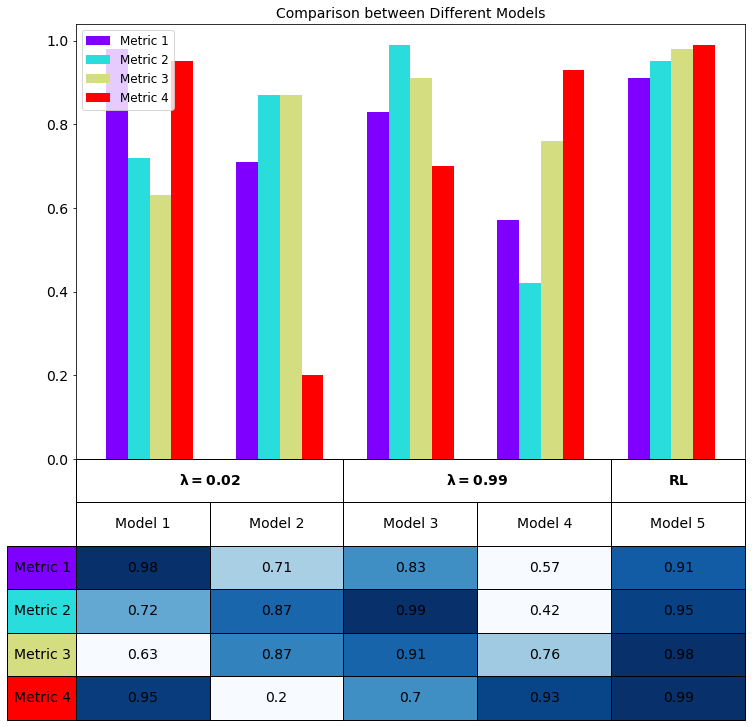

In [44]:
# 按照model来进行汇总, 这里共有5个model
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

# 自定义颜色
# colors = plt.cm.BuPu(np.linspace(0, 0.5, len(pltPD.index.values)))
colors = plt.cm.rainbow(np.linspace(0, 1, len(pltPD.index.values))) # plasma, rainbow, jet
n_rows = len(pltPD.index.values)

# 设置barchart的x轴
w=0.3
index = np.arange(len(pltPD.columns.values))*n_rows*w*1.5 # 5个model, 所以是5


# 首先绘制柱状图
for row in range(n_rows):
    plt.bar(index+row*w, pltPD.values[row], width=w, align='center', color=colors[row], label=pltPD.index.values[row])

# 添加图例
ax.legend(fontsize=12)

# 矩阵的颜色高亮
# norm = plt.Normalize(0, 1)
# cellColours = plt.cm.Blues(norm(pltPD.values))
# 使用最大最小标准化, 使得颜色区分更大
minmax = (pltPD.values - pltPD.values.min(1, keepdims=True)) / (pltPD.values.max(1, keepdims=True) - pltPD.values.min(1, keepdims=True))
cellColours = plt.cm.Blues(minmax)

# 给表格添加一个标题
header = plt.table(cellText=[['']*2],
                   colLabels=['$\\bf{\lambda=0.02}$', '$\\bf{\lambda=0.99}$'],
                   loc='bottom',
                   cellLoc='center',
                   bbox=[0, -0.2, 0.8, 0.2] # x0, y0, width, height
                   )
header.set_fontsize(14)
header.scale(1.0, 1.7)  # may help

header_1 = plt.table(cellText=[['']],
                     colLabels=['$\\bf{RL}$'],
                     loc='bottom',
                     cellLoc='center',
                     bbox=[0.8, -0.2, 0.2, 0.2]
                     )
header_1.set_fontsize(14)
header_1.scale(1.0, 1.7)  # may help

# 添加一个表格在底部
the_table = plt.table(cellText=pltPD.values,
                      cellColours = cellColours,
                      rowLabels=pltPD.index.values,
                      rowColours=colors, # 每一列的颜色
                      colLabels=pltPD.columns.values,
                      loc='bottom',
                      cellLoc='center',
                      bbox=[0, -0.6, 1.0, 0.5])
the_table.set_fontsize(14)
the_table.scale(1.0, 1.7)  # may help

# 调整table的布局
# plt.subplots_adjust(left=0.2, bottom=0.1)

# label和ticks的设置
# minN, maxN = pltPD.values.flatten().min(), pltPD.values.flatten().max()
# plt.yticks(np.arange(minN, maxN, (maxN-minN)/5), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.xticks([])
plt.title('Comparison between Different Models', fontsize=14)

plt.show()